<a href="https://colab.research.google.com/github/mckang6113875/AP_Test_OPEN/blob/main/Image_Noise_Canceling_edit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Noise Canceling

In [1]:
! git clone https://github.com/mckang6113875/AP_Test_OPEN.git

Cloning into 'AP_Test_OPEN'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (205/205), done.
remote: Total 205 (delta 139), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (205/205), 44.41 MiB | 4.65 MiB/s, done.
Resolving deltas: 100% (139/139), done.


# Sin, Cos Noise 

complex128
500729.49154169904


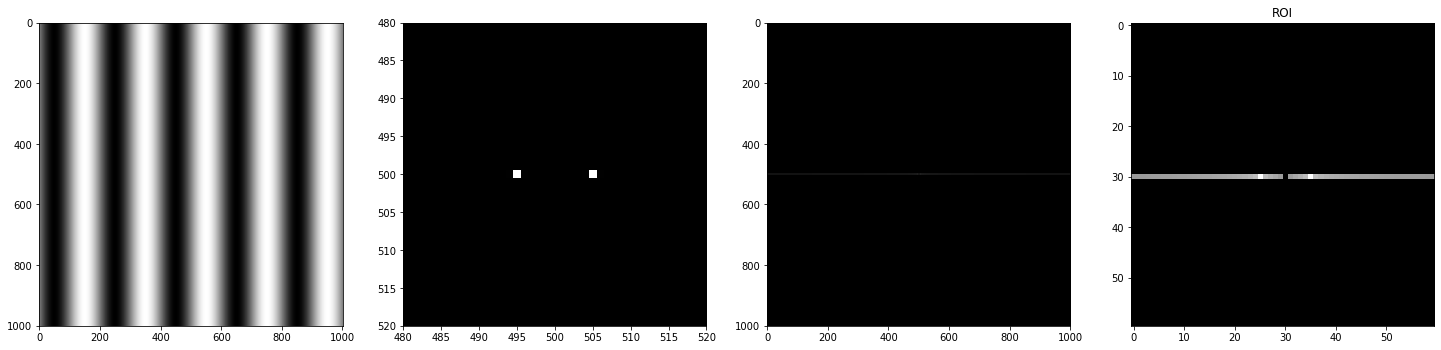

In [10]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 200
angle = 0

grating = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength)

fig = plt.figure(figsize=(25, 10))
plt.set_cmap("gray")
plt.subplot(141)
plt.imshow(grating)

##############################################
ft1 = np.fft.fft2(grating)
ft1 = np.fft.fftshift(ft1)
magnitude_spectrum1 = 20*np.log(np.abs(ft1)+0.001)
##############################################

plt.subplot(142)
plt.imshow(abs(ft1))
plt.xlim([480, 520])
plt.ylim([520, 480])

plt.subplot(143)
plt.imshow(magnitude_spectrum1)

ROI1 = magnitude_spectrum1[470:530, 470:530]
plt.subplot(144)
plt.imshow(ROI1, cmap='gray')
plt.title('ROI')

print(ft1.dtype)
print(abs(ft1[500, 495]))

complex128
8614.816106776349
181.22477838222363


(None, None)

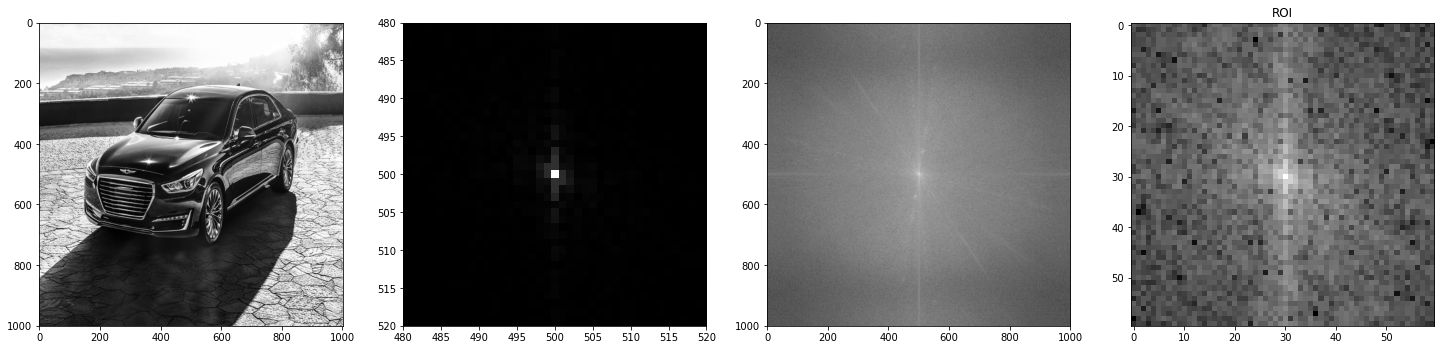

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import color
from skimage import io

original = color.rgb2gray(io.imread('/content/AP_Test_OPEN/G90_2.jpg'))
original = cv2.resize(original, (1001, 1001))

fig = plt.figure(figsize=(25, 10))
plt.set_cmap("gray")
plt.subplot(141)
plt.imshow(original)

##############################################
ft2 = np.fft.fft2(original)
ft2 = np.fft.fftshift(ft2)
magnitude_spectrum2 = 20*np.log(np.abs(ft2)+0.001)
##############################################

plt.subplot(142)
plt.imshow(abs(ft2))
plt.xlim([480, 520])
plt.ylim([520, 480])

plt.subplot(143)
plt.imshow(magnitude_spectrum2)

ROI2 = magnitude_spectrum2[470:530, 470:530]
plt.subplot(144)
plt.imshow(ROI2, cmap='gray')
plt.title('ROI')

print(ft2.dtype)
print(abs(ft2[500, 495])), print(ROI2[30, 25])

<function matplotlib.pyplot.show>

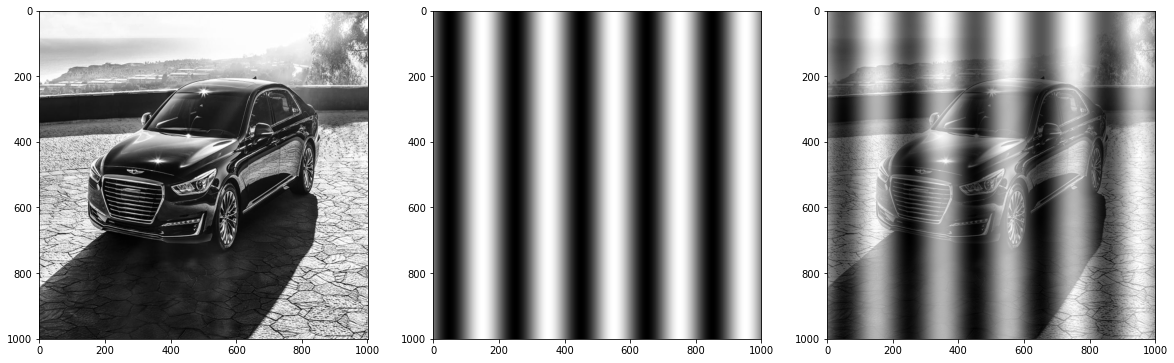

In [13]:
noised = cv2.add(original, grating)

fig, axs = plt.subplots(1,3, figsize = (20, 10))
axs[0].imshow(original, cmap ='gray')
axs[1].imshow(grating, cmap ='gray')
axs[2].imshow(noised, cmap ='gray')
plt.show 

complex128
504720.6457072875
(-15582.686044509193-504480.03934627527j)
262.6352076072559


(None, None, None)

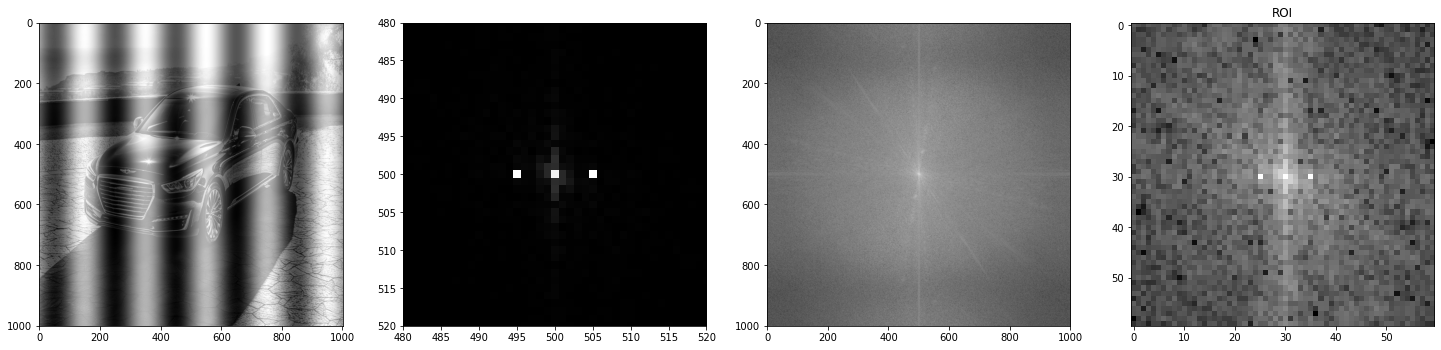

In [25]:
fig = plt.figure(figsize=(25, 10))
plt.set_cmap("gray")
plt.subplot(141)
plt.imshow(noised)

##############################################
ft3 = np.fft.fft2(noised)
ft3 = np.fft.fftshift(ft3)
magnitude_spectrum3 = 20*np.log(np.abs(ft3)+0.001)
##############################################

plt.subplot(142)
plt.imshow(abs(ft3))
plt.xlim([480, 520])
plt.ylim([520, 480])

plt.subplot(143)
plt.imshow(magnitude_spectrum3)

ROI3 = magnitude_spectrum3[470:530, 470:530]
plt.subplot(144)
plt.imshow(ROI3, cmap='gray')
plt.title('ROI')

print(ft3.dtype)
print(abs(ft3[500, 495])), print((ft3[500, 495])), print(ROI3[30, 25])

## Noise removal

complex128
0.0
-138.15510557964274


(None, None)

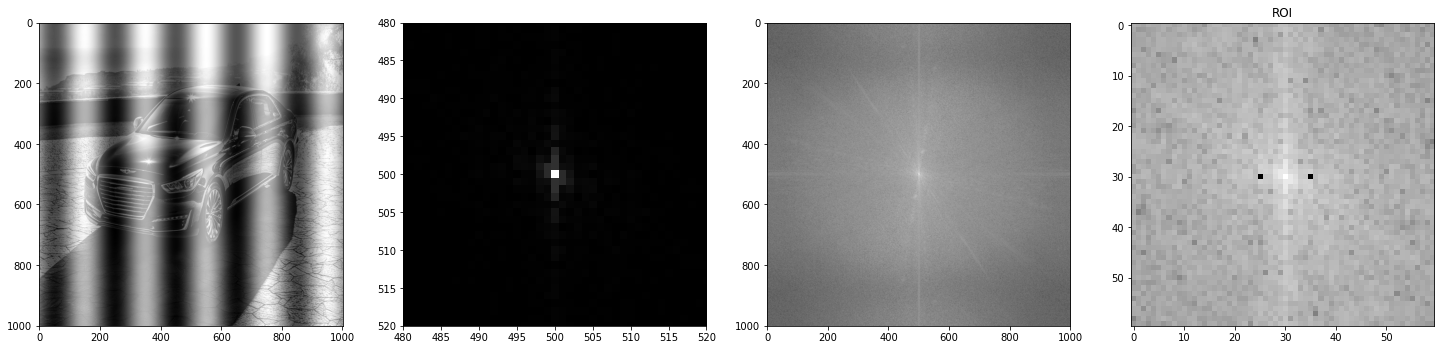

In [29]:
ft4 = ft3
#############################################
ft4[500, 495] = 0
ft4[500, 505] = 0
#############################################

fig = plt.figure(figsize=(25, 10))
plt.set_cmap("gray")
plt.subplot(141)
plt.imshow(noised)

##############################################
ft4 = np.fft.ifftshift(ft4)
ft4 = np.fft.fftshift(ft4)
magnitude_spectrum4 = 20*np.log(np.abs(ft4)+0.001)
##############################################

plt.subplot(142)
plt.imshow(abs(ft4))
plt.xlim([480, 520])
plt.ylim([520, 480])

plt.subplot(143)
plt.imshow(magnitude_spectrum4)

ROI4 = magnitude_spectrum4[470:530, 470:530]
plt.subplot(144)
plt.imshow(ROI4, cmap='gray')
plt.title('ROI')

print(ft4.dtype)
print(abs(ft4[500, 495])), print(ROI4[30, 25])


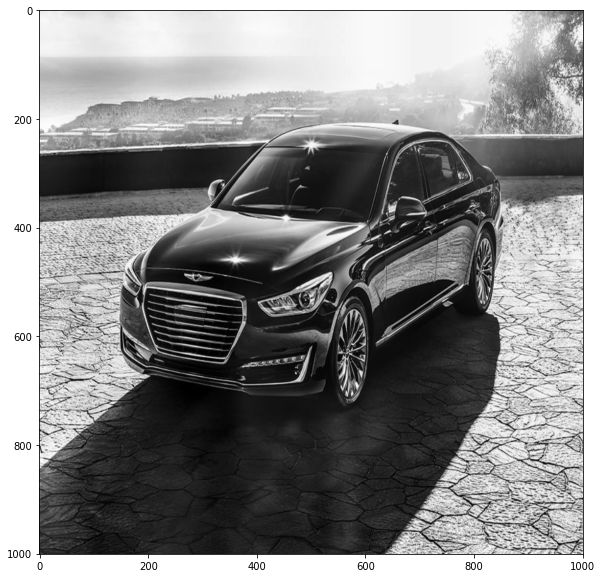

In [31]:
fig = plt.figure(figsize=(25, 10))
f_ishift= np.fft.ifftshift(ft4)
img_back= np.fft.ifft2(f_ishift)
img_back= np.abs(img_back)
plt.imshow(img_back)